In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:

df_german = pd.read_csv("GermanCredit.csv")

df_german.columns



Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [8]:
#preprocessing 1
#Drop the 3 columns that contribute the least to the dataset. 
#These would be the columns with the highest number of non-zero 'none' values. 
#Break ties by going left to right in columns. 
#(Your code should be generalizable to drop n columns, but for the rest of the analysis, 
# you can call your code for n=3.)


def drop_top_n_none_columns(df_german, n):
    col_with_none = {}

   
    for idx, col in enumerate(df_german.columns):
        none_count = (df_german[col] == 'none').sum()
        if none_count > 0:
            col_with_none[col] = (none_count, idx)
            
    
    sorted_cols = sorted(col_with_none.items(), key=lambda item: (-item[1][0], item[1][1]))
    cols_to_drop = [col for col, _ in sorted_cols[:n]]
    df_german.drop(columns=cols_to_drop,inplace=True)


drop_top_n_none_columns(df_german,3)

#TESTING/EXECUTING
df_german.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad


In [9]:
#preprocessing 2
#Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes

df_german = df_german.replace("'", "", regex=True)

#TESTING/EXECUTING
df_german.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


In [29]:
#PREPROCESSING 3
#The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'.
#Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

mapping1 = {
    'no checking': 'No Checking',
    '<0': 'Low',
    '0<=X<200': 'Medium',
    '>=200': 'High'
}

df_german['checking_status'] = df_german['checking_status'].replace(mapping1)
#TESTING/EXECUTING
df_german.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [30]:
#PREPROCESSING 4

#The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. 
#Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

mapping2 = {

    'no known savings' : 'No Savings',
    '<100' : 'Low',
    '100<=X<500' : 'Medium',
    '500<=X<1000': 'High',
    '>=1000': 'High'

}

df_german["savings_status"] = df_german["savings_status"].replace(mapping2)
#TESTING/EXECUTING
df_german.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [31]:
#PREPROCESSING 5

#Change class column values from 'good' to '1' and 'bad' to '0'.

mapping3 = {

    'good' : '1',
    'bad' : '0'

}

df_german["class"] = df_german["class"].replace(mapping3)
#TESTING/EXECUTING
df_german.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [32]:
#PREPROCESSING 6
#and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

df_german["employment"].unique()
mapping4 = { 
    'unemployed' : 'Unemployed',
    '<1' : 'Amateur',
    '1<=X<4' : 'Professional',
    '4<=X<7' : 'Experienced',
    '>=7' : 'Expert'

}

df_german["employment"] = df_german["employment"].replace(mapping4)
#TESTING/EXECUTING
df_german.head()



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


In [33]:
#ANALYSIS 1a

#Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

crosstab_result = pd.crosstab(df_german['foreign_worker'], df_german['class'])
#TESTING/EXECUTING
crosstab_result


class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [34]:
#ANALYSIS 1B

#Similarly, get the count of each category of employment for each category of saving_status.
crosstab_result = pd.crosstab(df_german['employment'], df_german['savings_status'])
#TESTING/EXECUTING
crosstab_result


savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [35]:
#ANALYSIS 2

#Find the average credit_amount of single males that have 4<=X<7 years of employment. 
#You can leave the raw result as is, no need for rounding

#personal_status, credit_amount, employment

single_males_df = df_german[df_german["personal_status"]== "male single"]
experienced_males_df = single_males_df[single_males_df["employment"] == "Experienced"]
experienced_males_df_avg = experienced_males_df["credit_amount"].mean()
#TESTING/EXECUTING
experienced_males_df_avg


4142.592592592592

In [36]:
#ANALYSIS 3

#Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

df_german["job"].unique()
for job in df_german["job"].unique():
    avg_credit = df_german[df_german["job"] == job]["duration"].mean()
    print(f"{job} = {avg_credit}") #TESTING/EXECUTING



skilled = 21.41111111111111
unskilled resident = 16.535
high qualif/self emp/mgmt = 25.16891891891892
unemp/unskilled non res = 17.363636363636363


In [37]:
#ANALYSIS 4

#For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:

#Most common checking status: ...
#Most common savings status: ...


education_df = df_german[df_german["purpose"] == "education"]
education_df.head(5)

#TESTING/EXECUTING
highest_checking = education_df["checking_status"].value_counts().iloc[0]
print(f" Most common checking status: {highest_checking}")

highest_savings = education_df["savings_status"].value_counts().iloc[0]
print(f" Most common savings status: {highest_savings}")


 Most common checking status: 20
 Most common savings status: 30


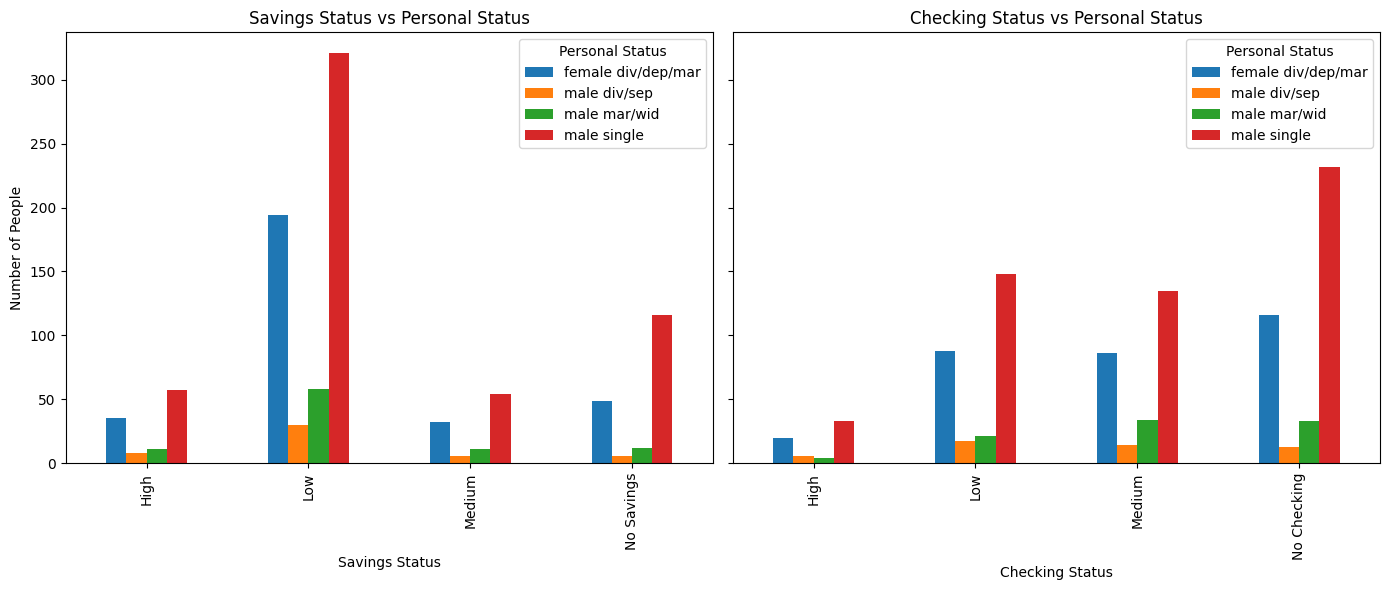

In [38]:
#VISUALIZATION 1

#Plot subplots of two bar charts: one for savings_status (x-axis) to 
#personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). 
#In each of the charts, each personal status category bar (number of people in that category) should be of a different color.


savings_vs_personal = pd.crosstab(df_german['savings_status'], df_german['personal_status'])
checking_vs_personal = pd.crosstab(df_german['checking_status'], df_german['personal_status'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

savings_vs_personal.plot(kind='bar', ax=axes[0])
axes[0].set_title('Savings Status vs Personal Status')
axes[0].set_xlabel('Savings Status')
axes[0].set_ylabel('Number of People')
axes[0].legend(title='Personal Status')


checking_vs_personal.plot(kind='bar', ax=axes[1])
axes[1].set_title('Checking Status vs Personal Status')
axes[1].set_xlabel('Checking Status')
axes[1].legend(title='Personal Status')

plt.tight_layout()
#TESTING/EXECUTING
plt.show()

property_magnitude
car                  32.204301
life insurance       35.379310
no known property    42.157143
real estate          35.720000
Name: age, dtype: float64


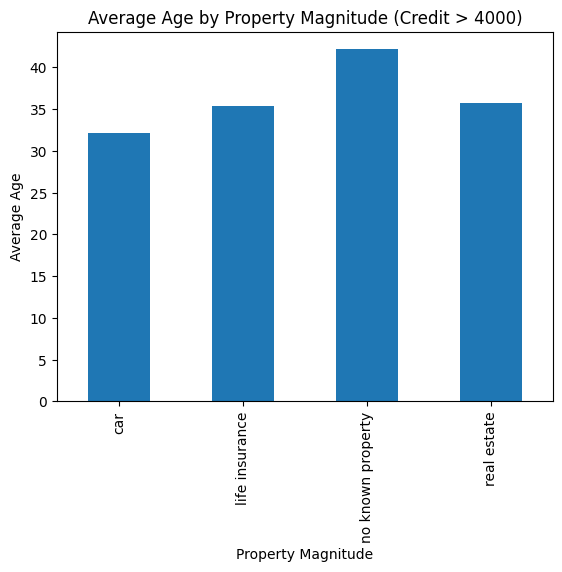

In [39]:
#VISUALIZATION 2


#For people having credit_amount more than 4000, plot a bar graph which maps 
#property_magnitude (x-axis) to the average customer age for that magnitude (y-axis)



high_credit_df = df_german[df_german['credit_amount'] > 4000]

avg_age_by_property = high_credit_df.groupby('property_magnitude')['age'].mean()
print(avg_age_by_property)

avg_age_by_property.plot(kind='bar')


plt.xlabel('Property Magnitude')
plt.ylabel('Average Age')
plt.title('Average Age by Property Magnitude (Credit > 4000)')
#TESTING/EXECUTING
plt.show()


In [ ]:
#VISUALIZATION 3(a,b,c)

#For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
#Personal status
#Credit history
#Job


#did some formstting of pie to make it look better (for myself))

filtered_df = df_german[(df_german['savings_status'] == 'High') & (df_german['age'] > 40)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Personal status
filtered_df['personal_status'].value_counts().plot.pie(
    ax=axes[0], autopct='%1.1f%%', startangle=90, title='Personal Status'
)

# Credit history
filtered_df['credit_history'].value_counts().plot.pie(
    ax=axes[1], autopct='%1.1f%%', startangle=90, title='Credit History'
)

# Job
filtered_df['job'].value_counts().plot.pie(
    ax=axes[2], autopct='%1.1f%%', startangle=90, title='Job'
)

for ax in axes:
    ax.set_ylabel('')  

plt.tight_layout()
#TESTING/EXECUTING
plt.show()
